# 시황과 운임관련

```
운임 pricing 파트 담당자 다은이는 해상운임 비딩을 할 때 사용할 객관적 운임수준을 알고 싶다. 

객관적 운임수준이란 해상운임과 관계있는 시황인 유가, 환율, 구매관리지수와 같은 경제적 시황, 그리고 가용선박의 양과 해상시황을 나타내는 공인된 국제 지표 등에 의해 결정되는 수준을 말한다. 

즉, 다은이는 이러한 시황변수들이 해상운임에 미치는 영향력을 분석하고 따라서 현재의 시황이 결정하는 적절한 운임을 결정하려고 한다

dataset.csv
- 기수별(일반적으로 6개월단위)의 집계 된 시황 정보
```
| 컬럼           | 정의                                | 타입   |
| -------------- | ----------------------------------- | ------ |
| IND            | 기수(1~13)                          | double |
| USD_KOR_avg    | 기수의 평균 원화환율(원/달러)           | double |
| WTI_avg        | 기수의 평균 유가(배럴/달러)            | double |
| PMI_avg        | 기수의 평균 구매관리지수            | double |
| SCFI_avg       | 기수의 평균 상하이컨테이너 운임지수 | double |
| IDLE_FLEET_avg | 기수의 평균 유휴컨테이너선박대수    | double |

```
ap.txt
- 기수별 단일 라우트의 운임으로 구성되어 있다
```
| 컬럼 | 정의                         | 타입   |
| ---- | ---------------------------- | ------ |
| IND  | 기수(1~12)                   | double |
| AP   | 기수의 해상 운임($/컨테이너) | double |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('data/dataset.csv')
print(dataset.shape)
dataset.head()

(13, 6)


IND  USD_KOR_avg   WTI_avg  PMI_avg   SCFI_avg  IDLE_FLEET_avg
0  1.0    1096.6100   93.8025   51.725  1156.4325           14.75
1  2.0    1128.9250  100.2375   53.425  1067.0500           16.25
2  3.0    1067.0925   99.7175   56.525  1006.6125            5.50
3  4.0    1061.9125   99.6350   53.825  1083.5100           16.50
4  5.0    1022.4600  101.3725   56.450  1138.1300            5.25

In [3]:
ap = pd.read_csv('data/ap.txt', delimiter='\t')
print(ap.shape)
ap.head()

(13, 2)


INDEX      AP
0      1  1896.0
1      2  1887.0
2      3  1829.0
3      4  1765.0
4      5  1770.0

## Q 1

```
dataset.csv으로 다음 분석을 수행하시오 
```

## Q 1-1

```
IND를 제외한 5개의 변수간 상관관계를 구해 변수들 간의 연관성을 파악한다. 
이때 상관 관계가 두번째로 큰 두개의 변수를 확인하여 알파벳 순서로 기술하시오

 (답안예시) IND, JND
```

In [7]:
# 상관 관계가 두번째로 큰 두개의 변수를 확인
# 코드입력
abs(dataset.drop('IND', 1).corr().unstack()).sort_values(ascending=False)

IDLE_FLEET_avg  IDLE_FLEET_avg    1.000000
SCFI_avg        SCFI_avg          1.000000
WTI_avg         WTI_avg           1.000000
PMI_avg         PMI_avg           1.000000
USD_KOR_avg     USD_KOR_avg       1.000000
SCFI_avg        WTI_avg           0.917757
WTI_avg         SCFI_avg          0.917757
USD_KOR_avg     IDLE_FLEET_avg    0.835845
IDLE_FLEET_avg  USD_KOR_avg       0.835845
SCFI_avg        USD_KOR_avg       0.764130
USD_KOR_avg     SCFI_avg          0.764130
WTI_avg         USD_KOR_avg       0.739384
USD_KOR_avg     WTI_avg           0.739384
PMI_avg         IDLE_FLEET_avg    0.732531
IDLE_FLEET_avg  PMI_avg           0.732531
                SCFI_avg          0.691972
SCFI_avg        IDLE_FLEET_avg    0.691972
WTI_avg         IDLE_FLEET_avg    0.590504
IDLE_FLEET_avg  WTI_avg           0.590504
USD_KOR_avg     PMI_avg           0.560913
PMI_avg         USD_KOR_avg       0.560913
                SCFI_avg          0.267718
SCFI_avg        PMI_avg           0.267718
PMI_avg    

**정답: USD_KOR_avg, IDLE_FLEET_avg**

## Q 1-2

```
상관이 큰 변수들을 하나로 묶기 위한 주성분분석을 수행하고자 한다. 

이를 위해 IND를 제외한 5개의 변수에 StandardScalar 정규화를 수행한다. 이 StandardScalar 정규화 결과를 이용하여 PCA를 수행한다. PCA 수행 결과, 설명력이 90% 보장 되는 주성분의 수는 몇 개인가
(답안예시) 1
```

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(dataset.drop('IND', 1))
print(features.shape)
features

(13, 5)


array([[-0.20446835,  0.95585134, -0.94647117,  1.3690836 , -0.19892413],
       [ 0.53022037,  1.22483299, -0.37156472,  0.89442907, -0.08991184],
       [-0.87555528,  1.2030971 ,  0.67679409,  0.57348332, -0.87116658],
       [-0.99332373,  1.19964861, -0.23629262,  0.98183783, -0.07174313],
       [-1.8902851 ,  1.27227575,  0.65143057,  1.27189047, -0.88933529],
       [-0.72908361,  0.30116213,  0.72752113,  0.57333728, -1.03468501],
       [-0.14596304, -0.73505467, -0.6449271 , -0.28173918, -0.43511742],
       [ 1.32398277, -1.11181011, -1.5411048 , -1.44871164,  1.27274176],
       [ 1.75731611, -1.30854778, -1.29874228, -1.93721297,  2.42342703],
       [ 0.79213013, -0.99539769, -0.77456287, -0.73966161,  0.95781737],
       [ 0.83729744, -0.87055565,  0.59506719, -0.18647107,  0.59444308],
       [ 0.32192784, -0.80019267,  1.40106348, -0.55457737, -0.82271667],
       [-0.72419554, -0.33530934,  1.7617891 , -0.51568772, -0.83482915]])

In [10]:
from sklearn.decomposition import PCA

pca = PCA(random_state=322)
pca.fit(features)

# PCA 수행 결과, 설명력이 90% 보장 되는 주성분의 수 확인
pca.explained_variance_ratio_

array([0.715334  , 0.20753427, 0.0366195 , 0.02847329, 0.01203894])

In [13]:
pca = PCA(n_components=2, random_state=322)
pca_features = pca.fit_transform(features)
pca_features

array([[-0.95216647, -1.62064863],
       [-0.62284557, -1.19524587],
       [-1.87711936, -0.02076888],
       [-1.44073205, -1.07555912],
       [-2.73647272, -0.30939561],
       [-1.49895602,  0.48649888],
       [ 0.38890403,  0.11725177],
       [ 2.94454293, -0.44138059],
       [ 3.94887382, -0.32464935],
       [ 1.89511993, -0.10628662],
       [ 0.97874779,  0.72343244],
       [-0.08104031,  1.85077693],
       [-0.94685598,  1.91597466]])

## Q 2

```
다음 과정의 전처리를 수행 후 질문에 답하시오.

1단계 dataset.csv와 ap.txt를 데이터 통합합니다. 통합 방법은 IND를 PK로 하여 2개 데이터 프레임을 JOIN 합니다. 

2단계. 1~12기의 데이터를 TRAIN으로 사용하여 Linear Regression 모형을 생성합니다.
- Feature: 1-2 에서 추출한 PCA 결과
- Label: AP
```

In [14]:
dataset['IND'] = dataset['IND'].astype('int')

In [15]:
dataset.head(2)

IND  USD_KOR_avg   WTI_avg  PMI_avg   SCFI_avg  IDLE_FLEET_avg
0    1     1096.610   93.8025   51.725  1156.4325           14.75
1    2     1128.925  100.2375   53.425  1067.0500           16.25

In [16]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
INDEX    13 non-null int64
AP       12 non-null float64
dtypes: float64(1), int64(1)
memory usage: 336.0 bytes


In [10]:
ap.head(2)

INDEX      AP
0      1  1896.0
1      2  1887.0

In [20]:
df = pd.merge(dataset, ap, left_on='IND', right_on='INDEX')
df.shape

(13, 8)

In [17]:
# dataset, ap 병합(merge)
df = pd.merge(dataset, ap, left_on='IND', right_on='INDEX')
print(df.shape)
df = df.drop('INDEX', 1)
df.tail()

(13, 8)


IND  USD_KOR_avg    WTI_avg    PMI_avg    SCFI_avg  IDLE_FLEET_avg      AP
8     9  1182.898333  39.630000  50.683333  533.821667       50.833333  1135.0
9    10  1140.445000  47.121667  52.233333  759.333333       30.666667  1054.0
10   11  1142.431667  50.108333  56.283333  863.505000       25.666667  1406.0
11   12  1119.763333  51.791667  58.666667  794.186667        6.166667  1351.0
12   13  1073.750000  62.913333  59.733333  801.510000        6.000000     NaN

## Q 2-1

```
13 기수의 시황 예측 값은?
- 예측 값은 소수점 4째자리 이하는 버림하시오

(답안예시) 1.234
```

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 12번까지의 IND를 학습 세트로 훈련
lr.fit(pca_features[:12], df.iloc[:12, -1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pred = lr.predict(# 코드입력)
pred

array([1466.30497878])

## Q 2-2

```
기수 별 예측값과 실제 값의 변화를 시각화하시오
```

In [14]:
preds = lr.predict(pca_features)
preds

array([1888.98834639, 1806.02641156, 1788.39995712, 1871.6649554 ,
       1906.83083978, 1690.89287102, 1550.48426479, 1367.42579333,
       1255.34647409, 1429.97752114, 1420.48418326, 1389.47838212,
       1466.30497878])

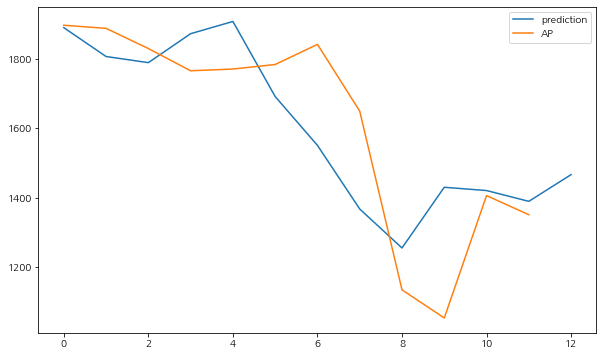

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(preds, label='prediction')
plt.plot(df['AP'], label='AP')
plt.legend()
plt.show()